* CLIENTNUM - Customer_ID
* Attrition_Flag - Trạng thái khách hàng (target)
* Customer_Age - Tuổi khách hàng
* Gender - Giới tính
* Dependent_count - Số người phụ thuộc
* Education_Level - Trình độ học vấn
* Marital_Status - Tình trạng hôn nhân
* Income_Category - Thu nhập
* Card_Category - Loại thẻ thanh toán
* Months_on_book - Thời gian sử dụng dịch vụ của ngân hàng
* Total_Relationship_Count - Tổng số sản phẩm khách hàng sử dụng
* Months_Inactive_12_mon -  Số tháng không hoạt động trong 12 tháng qua
* Contacts_Count_12_mon - Số tháng liên hệ trong 12 tháng qua
* Credit_Limit - Hạn mức sử dụng trên thẻ tín dụng
* Total_Revolving_Bal - Tổng số dư quay vòng trên thẻ tín dụng
* Avg_Open_To_Buy - Hạn mức tín dụng trung bình (trung bình 12 tháng qua)
* Total_Amt_Chng_Q4_Q1 - Thay đổi về số tiền giao dịch (Q4 so với Q1)
* Total_Trans_Amt - Tổng giá trị giao dịch (12 tháng qua)
* Total_Trans_Ct - Số lượng giao dịch (12 tháng qua)
* Total_Ct_Chng_Q4_Q1 - Thay đổi về số lượng giao dịch (Q4 so với Q1)
* Avg_Utilization_Ratio - Tỉ lệ sử dụng thẻ trung bình

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_2068\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
path = 'D:\\AI\\AI club\\Churn_prediction\\DATA\\BankChurners.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.996710,0.003294
1,717891558,Existing Customer,49,F,4,Graduate,Unknown,Less than $40K,Blue,36,...,3298.0,2200,1098.0,0.678,1052,32,0.600,0.667,0.000228,0.999770
2,716632758,Existing Customer,49,F,3,Graduate,Single,Less than $40K,Blue,36,...,2802.0,2363,439.0,0.750,1295,40,0.600,0.843,0.000044,0.999960
3,768563658,Existing Customer,56,M,2,Uneducated,Married,$40K - $60K,Blue,50,...,4458.0,1880,2578.0,1.107,1424,29,1.417,0.422,0.000197,0.999800
4,711427458,Existing Customer,44,F,5,Graduate,Married,Unknown,Blue,35,...,6273.0,978,5295.0,2.275,1359,25,1.083,0.156,0.000057,0.999940


In [5]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10073 entries, 0 to 10072
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10073 non-null  int64  
 1   Attrition_Flag            10073 non-null  object 
 2   Customer_Age              10073 non-null  int64  
 3   Gender                    10073 non-null  object 
 4   Dependent_count           10073 non-null  int64  
 5   Education_Level           10073 non-null  object 
 6   Marital_Status            10073 non-null  object 
 7   Income_Category           10073 non-null  object 
 8   Card_Category             10073 non-null  object 
 9   Months_on_book            10073 non-null  int64  
 10  Total_Relationship_Count  10073 non-null  int64  
 11  Months_Inactive_12_mon    10073 non-null  int64  
 12  Contacts_Count_12_mon     10073 non-null  int64  
 13  Credit_Limit              10073 non-null  float64
 14  Total_

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.007300e+04,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000,10073.000000
mean,7.391060e+08,46.307753,2.346173,35.907575,3.810583,2.342003,2.458553,8623.555296,1161.915914,7461.639383,0.756811,4420.605381,65.057778,0.709552,0.275008
std,3.686767e+07,8.013157,1.298633,7.981878,1.555072,1.009919,1.105574,9089.099323,814.972444,9091.240007,0.210386,3398.624057,23.371389,0.229991,0.275812
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130398e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2550.000000,347.000000,1322.000000,0.630000,2176.000000,45.000000,0.581000,0.022000
50%,7.179125e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4543.000000,1276.000000,3460.000000,0.736000,3911.000000,67.000000,0.700000,0.176000
75%,7.728792e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11037.000000,1783.000000,9827.000000,0.857000,4747.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.675000,18484.000000,139.000000,3.571000,0.999000


In [8]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8449
Attrited Customer    1624
Name: count, dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

# Age mean,min,max of Attrition_Flag

In [10]:
df.groupby('Attrition_Flag')[['Customer_Age']].agg(('mean','min','max')) # -> the elderly tend to be existing

Customer_Age        
                          mean min max
Attrition_Flag                        
Attrited Customer    46.633621  26  68
Existing Customer    46.245118  26  73

# Gender counting in Attrition_Flag 

In [11]:
df.groupby('Attrition_Flag')['Gender'].count()

Attrition_Flag
Attrited Customer    1624
Existing Customer    8449
Name: Gender, dtype: int64

# Female counting in Existing Customer

In [12]:
df[(df['Gender'] == 'F') & (df['Attrition_Flag'] == 'Existing Customer')]['Attrition_Flag'].count() # -> More women use the service than men 

4412

# Feature engineering 

In [13]:
def agelabel(x):
    if x <= 26:
        return 'Young'
    elif x > 26 and x <= 41:
        return 'Middle Age'
    elif x > 41 and x <= 52:
        return 'Older Adults'
    else:
        return 'the elderly'
df['Age_Rank'] = df['Customer_Age'].apply(agelabel)

In [14]:
df['Income_Category'].replace('Unknown', pd.NA, inplace=True)
df.dropna(subset=['Income_Category'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2068\4047127589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income_Category'].replace('Unknown', pd.NA, inplace=True)


In [15]:
df['Mean_Income'] = df['Income_Category'].map(
    {
        'Less than $40K': 19825,
        '$60K - $80K': 70000,
        '$40K - $60K': 50000,
        '$80K - $120K': 100000,
        'Larger than $120K': 160000
        
    }
)

In [16]:
df['Attrition_Flag'] = df['Attrition_Flag'].map(
    {'Attrited Customer': 0,
     'Existing Customer': 1
     }
)

In [17]:
df.dropna(subset=['Mean_Income'], inplace=True)
df.drop(columns='Income_Category', inplace=True)

In [18]:
y = df['Attrition_Flag']
X = df.drop(columns=['Attrition_Flag'])

In [19]:
y.head()

1    1
2    1
3    1
5    1
6    1
Name: Attrition_Flag, dtype: int64

# Transform

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [21]:
Category = X.select_dtypes(include='object').columns.to_list()
Numerical = X.select_dtypes(include=('float64','int64')).columns.to_list()

In [22]:
print(f'Categories: {Category}')
print(f'Numeric: {Numerical}')

Categories: ['Gender', 'Education_Level', 'Marital_Status', 'Card_Category', 'Age_Rank']
Numeric: ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Mean_Income']


In [23]:
stan = StandardScaler()
X[Numerical] = stan.fit_transform(X[Numerical])

# Create an instance of OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
cate_onehot = enc.fit_transform(X[Category])
cate_onehot = cate_onehot.toarray()
# Convert the sparse matrix to a DataFrame with appropriate column names
cate_onehot_df = pd.DataFrame(cate_onehot, columns=enc.get_feature_names_out(Category))

# Ensure the indices are consistent
X.reset_index(drop=True, inplace=True)
cate_onehot_df.reset_index(drop=True, inplace=True)

# Concatenate the numerical columns and the one-hot encoded categorical columns
X_final = pd.concat([X[Numerical], cate_onehot_df], axis=1)


In [24]:
X_final.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Age_Rank_Middle Age,Age_Rank_Older Adults,Age_Rank_Young,Age_Rank_the elderly
0,-0.578774,0.349485,1.267105,0.019647,1.405585,1.649045,-0.407881,-0.521142,1.276258,-0.648444,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.612907,0.349485,0.501041,0.019647,-1.165938,-0.336024,-2.217492,-0.582227,1.476895,-0.729554,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.795225,1.222962,-0.265022,1.778160,0.119823,-0.336024,0.496924,-0.378283,0.882368,-0.466285,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.681802,-0.523992,-0.265022,-0.231569,0.119823,1.649045,0.496924,-0.516462,0.726044,-0.588750,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.310974,1.098179,0.501041,1.401336,0.119823,-0.336024,0.496924,-0.504147,1.049771,-0.608812,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Check unbalanced data

In [25]:
y.value_counts()

Attrition_Flag
1    6929
0    1312
Name: count, dtype: int64

# Train_test_split

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, shuffle=True)

# Upsampling

In [28]:
sm = SMOTE(random_state=42, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5540, 1: 5540})


# Training

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [30]:
model = []

model.append(('Randomforest', RandomForestClassifier()))
model.append(('KNN', KNeighborsClassifier()))
model.append(('Logistic', LogisticRegression()))
model.append(('SVC', SVC()))
print('Model: {}'.format(model))

Model: [('Randomforest', RandomForestClassifier()), ('KNN', KNeighborsClassifier()), ('Logistic', LogisticRegression()), ('SVC', SVC())]


# Cross_validation

In [31]:
model_names = []
scores = []
# Creating a for loop to see cross validation scores for every model above:
np.random.seed(42)
for names, models in model:
    score = cross_val_score(models, X_res, y_res, cv=4, scoring='accuracy')
    scores.append(score)
    model_names.append(models)
    print(f"Mean of the {names} model scores : {score.mean()}")

Mean of the Randomforest model scores : 0.9761732851985558
Mean of the KNN model scores : 0.9143501805054151
Mean of the Logistic model scores : 0.8611010830324909
Mean of the SVC model scores : 0.9494584837545127


# Predict Prob

In [32]:
from sklearn.metrics import classification_report, log_loss, roc_auc_score, confusion_matrix

In [33]:
random_iterations  = np.random.randint(0,100)
log_loss_train = []
log_loss_test = []
roc_auc_train = []
roc_auc_test = []
random_seeds = []
for i in range(random_iterations):
    rdf = RandomForestClassifier(random_state=i, class_weight='balanced').fit(X_res, y_res)
    # Predict probabilities on the training set
    y_train_proba = rdf.predict_proba(X_res)
    log_loss_train.append(log_loss(y_res, y_train_proba))
    roc_auc_train.append(roc_auc_score(y_res, y_train_proba[:, 1] >= 0.5))
    
    # Predict probabilities on the test set
    y_test_proba = rdf.predict_proba(X_test)
    log_loss_test.append(log_loss(y_test, y_test_proba))
    roc_auc_test.append(roc_auc_score(y_test, y_test_proba[:, 1] >= 0.5))
    
    # Append the random seeds to the respective list
    random_seeds.append(i)

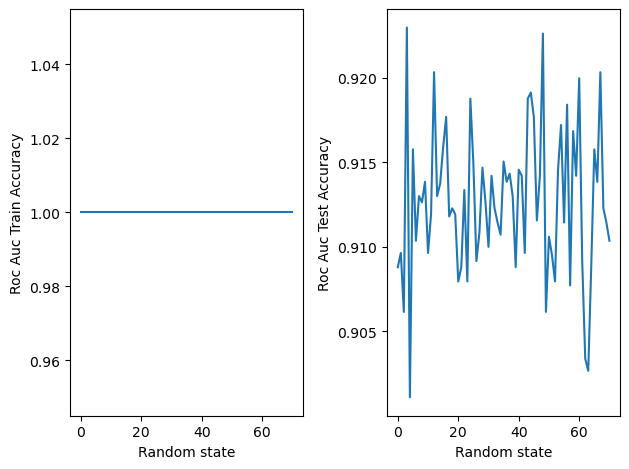

In [54]:
def rdf_plot(acc_score_train, acc_score_test):
    plt.subplot(121)
    plt.plot(acc_score_train)
    plt.xlabel('Random state')
    plt.ylabel('Roc Auc Train Accuracy')
    plt.subplot(122)
    plt.plot(acc_score_test)
    plt.xlabel('Random state')
    plt.ylabel('Roc Auc Test Accuracy')
    plt.tight_layout()
rdf_plot(roc_auc_train, roc_auc_test)

In [35]:
# Convert probabilities to class predictions
y_train_pred = np.argmax(y_train_proba, axis=1) 
y_test_pred = np.argmax(y_test_proba, axis=1) 

In [36]:
print(f'Report metrics on Train: {classification_report(y_res, y_train_pred)}')
print(f'Report metrics on Test: {classification_report(y_test, y_test_pred)}')

Report metrics on Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5540
           1       1.00      1.00      1.00      5540

    accuracy                           1.00     11080
   macro avg       1.00      1.00      1.00     11080
weighted avg       1.00      1.00      1.00     11080

Report metrics on Test:               precision    recall  f1-score   support

           0       0.82      0.86      0.84       260
           1       0.97      0.96      0.97      1389

    accuracy                           0.95      1649
   macro avg       0.90      0.91      0.90      1649
weighted avg       0.95      0.95      0.95      1649



# Feature Selection

In [37]:
feature_list = []
feature_scores = rdf.feature_importances_
print("Feature : Score")
for feature, score in zip(X_res.columns, feature_scores):
    print(f"{feature}: {score}")
    if score >= 0.05:
        feature_list.append(feature)

Feature : Score
CLIENTNUM: 0.01649388169875261
Customer_Age: 0.01944212600184622
Dependent_count: 0.011722547252115524
Months_on_book: 0.016314901017587077
Total_Relationship_Count: 0.05564342326385103
Months_Inactive_12_mon: 0.045504399687650236
Contacts_Count_12_mon: 0.038814153994633185
Credit_Limit: 0.02285910253681322
Total_Revolving_Bal: 0.10314654580382712
Avg_Open_To_Buy: 0.021083458179838054
Total_Amt_Chng_Q4_Q1: 0.04788334513307519
Total_Trans_Amt: 0.16527826791826114
Total_Trans_Ct: 0.21328484208484672
Total_Ct_Chng_Q4_Q1: 0.07454689230684451
Avg_Utilization_Ratio: 0.05049722634807427
Mean_Income: 0.00942048584737292
Gender_F: 0.007486792151839748
Gender_M: 0.007373801615068526
Education_Level_College: 0.0028125928509621146
Education_Level_Doctorate: 0.0015898581846994768
Education_Level_Graduate: 0.008829332168441504
Education_Level_High School: 0.006767240051212296
Education_Level_Post-Graduate: 0.0034402338843409286
Education_Level_Uneducated: 0.004426732501386963
Educati

In [38]:
feature_list

['Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [39]:
X_res = X_res[feature_list]

# Train test split

In [40]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, train_size=0.2, random_state=42, shuffle=True)

In [41]:
print('Size of X_train: {}'.format(len(X_train_res)))
print('Size of X_test: {}'.format(len(X_test_res)))
print('Size of y_train: {}'.format(len(y_train_res)))
print('Size of y_test: {}'.format(len(y_test_res)))

Size of X_train: 2216
Size of X_test: 8864
Size of y_train: 2216
Size of y_test: 8864


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_loss_train_rdf = []
log_loss_test_rdf = []
roc_auc_train_rdf = []
roc_auc_test_rdf = []
max_depth_rdf = []
for i in range(1, random_iterations):
    rdfs = RandomForestClassifier(
        random_state=i,
        max_depth=i,
        ).fit(X_train_res, y_train_res)
    # Predict probabilities on the training set
    y_train_proba_rdf = rdfs.predict_proba(X_train_res)
    roc_auc_train_rdf.append(roc_auc_score(y_train_res, y_train_proba_rdf[:, 1] >= 0.7))
    
    # Predict probabilities on the test set
    y_test_proba_rdf = rdfs.predict_proba(X_test_res)
    roc_auc_test_rdf.append(roc_auc_score(y_test_res, y_test_proba_rdf[:, 1] >= 0.7))
    max_depth_rdf.append(i)

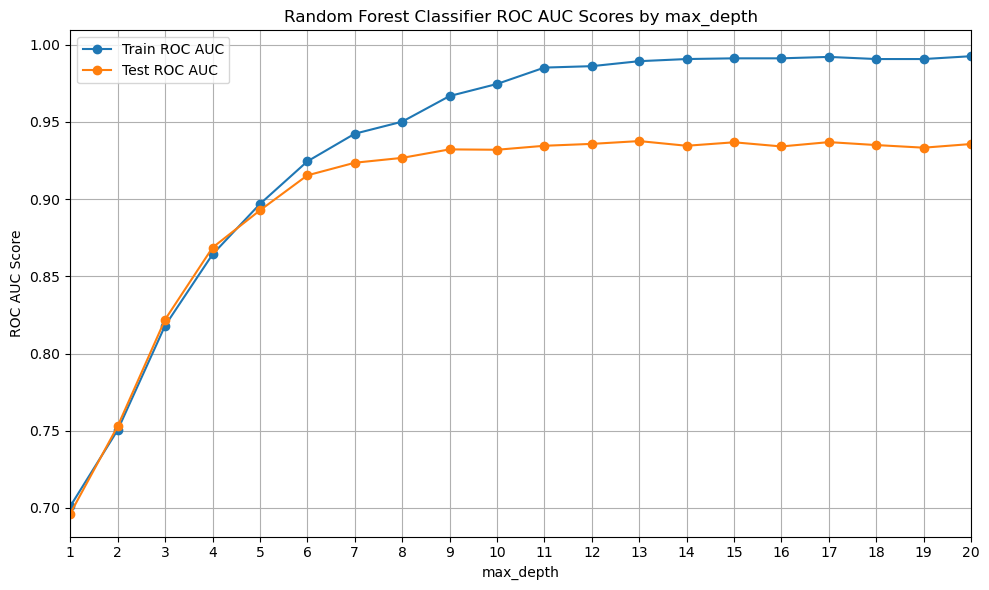

In [44]:
def rdf_plot(acc_score_train, acc_score_test, max_depth_rdf):
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_rdf, acc_score_train, marker='o', label='Train ROC AUC')
    plt.plot(max_depth_rdf, acc_score_test, marker='o', label='Test ROC AUC')
    plt.title('Random Forest Classifier ROC AUC Scores by max_depth')
    plt.xlabel('max_depth')
    plt.ylabel('ROC AUC Score')
    plt.xticks(max_depth_rdf)
    plt.xlim((1,20))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
rdf_plot(roc_auc_train_rdf, roc_auc_test_rdf, max_depth_rdf)

In [45]:
rdfs_new = RandomForestClassifier(
    random_state=42,
    max_depth=15,
    n_jobs=-1,
    class_weight='balanced'
    ).fit(X_train_res, y_train_res)
# Predict probabilities on the training set
y_train_proba_rdf_new = rdfs_new.predict_proba(X_train_res)
# Predict probabilities on the test set
y_test_proba_rdf_new = rdfs.predict_proba(X_test_res)


In [46]:
print(f'Report metrics on Train: {classification_report(y_train_res, y_train_proba_rdf_new[:, 1] >= 0.5)}')
print(f'Report metrics on Test: {classification_report(y_test_res, y_test_proba_rdf_new[:, 1] >= 0.5)}')

Report metrics on Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1132
           1       1.00      1.00      1.00      1084

    accuracy                           1.00      2216
   macro avg       1.00      1.00      1.00      2216
weighted avg       1.00      1.00      1.00      2216

Report metrics on Test:               precision    recall  f1-score   support

           0       0.95      0.95      0.95      4408
           1       0.95      0.95      0.95      4456

    accuracy                           0.95      8864
   macro avg       0.95      0.95      0.95      8864
weighted avg       0.95      0.95      0.95      8864



# Inference on testset with Randomforest

In [47]:
y_test_proba_rdf_new_classify = np.argmax(y_test_proba_rdf_new, axis=1)

In [48]:
df_rdf_test = pd.DataFrame(
    {'Test True': y_test_res,
     'Test Predict': y_test_proba_rdf_new_classify,
     }
    
)
print('Randomforest on test predict')
df_rdf_test

Randomforest on test predict


,Test True,Test Predict
5880,1,1
9583,0,0
7936,0,0
6913,0,0
2485,0,0
...,...,...
9121,0,0
5607,1,1
5978,1,1
8843,0,0


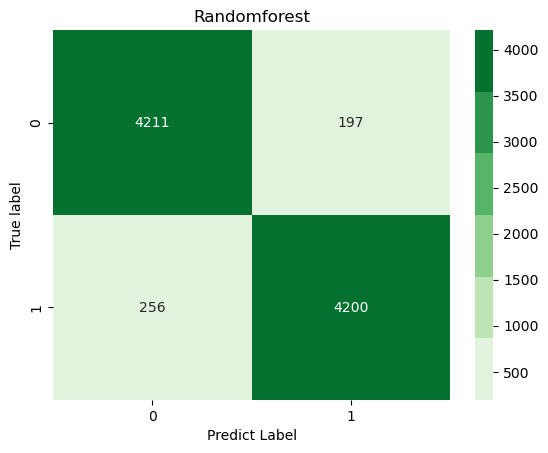

In [49]:
colormap = sns.color_palette("Greens")
sns.heatmap(confusion_matrix(df_rdf_test['Test True'], df_rdf_test['Test Predict']), annot=True, fmt='d', cmap=colormap)
plt.title('Randomforest')
plt.xlabel('Predict Label')
plt.ylabel('True label');

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logistic = LogisticRegression(
    fit_intercept=True,
    penalty='l2',
    random_state=42
    ).fit(X_train_res, y_train_res)
y_train_proba_lgts = logistic.predict_proba(X_train_res)[:, 1]
y_test_proba_lgts = logistic.predict_proba(X_test_res)[:, 1]

# Convert probabilities to binary predictions using a threshold of 0.5
y_train_pred_lgts = (y_train_proba_lgts >= 0.5).astype(int)
y_test_pred_lgts = (y_test_proba_lgts >= 0.5).astype(int)
  

In [52]:
print(f'Report metrics on Train: {classification_report(y_train_res, y_train_pred_lgts)}')
print(f'Report metrics on Test: {classification_report(y_test_res, y_test_pred_lgts)}')

Report metrics on Train:               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1132
           1       0.83      0.81      0.82      1084

    accuracy                           0.83      2216
   macro avg       0.83      0.83      0.83      2216
weighted avg       0.83      0.83      0.83      2216

Report metrics on Test:               precision    recall  f1-score   support

           0       0.83      0.84      0.84      4408
           1       0.84      0.83      0.83      4456

    accuracy                           0.83      8864
   macro avg       0.83      0.83      0.83      8864
weighted avg       0.84      0.83      0.83      8864



# Inference on testset with Logistic Regression

In [55]:
df_lgt_test = pd.DataFrame(
    {'Test True': y_test_res,
     'Test Predict': y_test_pred_lgts,
     }
    
)
print('Logistic on test predict')
df_lgt_test

Logistic on test predict


,Test True,Test Predict
5880,1,1
9583,0,0
7936,0,0
6913,0,0
2485,0,0
...,...,...
9121,0,0
5607,1,1
5978,1,1
8843,0,0


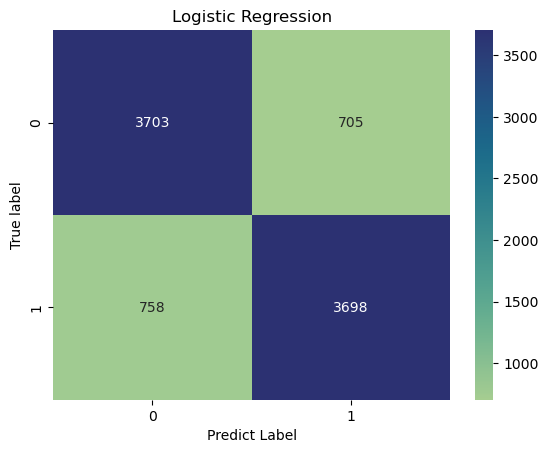

In [59]:
sns.heatmap(confusion_matrix(df_lgt_test['Test True'], df_lgt_test['Test Predict']), annot=True, fmt='d', cmap='crest')
plt.title('Logistic Regression')
plt.xlabel('Predict Label')
plt.ylabel('True label');